<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib as plt

In [27]:
# Import data
data = pd.read_csv('data_patentsview_20200115.csv', header=None, na_values=['\\N'])

/home/ekaterina/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
# Map column names
column_names = ['patent_id',
'application_year',
'grant_year',
'field_nber_category_id',
'field_nber_subcategory_id',
'field_wos_research_area',
'inventors_total',
'inventors_gender_final_male',
'inventors_gender_final_female',
'inventors_gender_final_unknown',
'uspc_csubclasses_new',
'uspc_csubclasses_total',
'uspc_csubclass_pairs_new',
'uspc_csubclass_pairs_total',
'cited_total',
'cited_self',
'cited_self_risk',
'cited_age_mean',
'cited_age_sd',
'absjsdis_nbersub_sp_tok_ttm0',
'absjsdis_nbersub_sp_pos_ttm0',
'abscodis_nbersub_sp_tok_ttm0',
'abscodis_nbersub_sp_pos_ttm0',
'absjsdis_nbersub_sp_tok_ttm5',
'absjsdis_nbersub_sp_pos_ttm5',
'abscodis_nbersub_sp_tok_ttm5',
'abscodis_nbersub_sp_pos_ttm5',
'abs_sentslen_mean_sp_tok',
'abs_sentslen_sd_sp_tok',
'abs_nsents_sp_tok',
'abs_ncsubjs_sp_tok',
'abs_nccomps_sp_tok',
'abs_nxcomps_sp_tok',
'abs_nadvcls_sp_tok',
'abs_nacls_sp_tok',
'abs_nlists_sp_tok',
'abs_nparataxis_sp_tok',
'abs_ntokens_sp_tok',
'abs_ntokens_unique_sp_tok',
'abs_nnouns_sp_tok',
'abs_nadjs_sp_tok',
'abs_nverbs_sp_tok',
'abs_nadverbs_sp_tok',
'abs_tokenslen_mean_sp_tok',
'abs_nounslen_mean_sp_tok',
'abs_adjslen_mean_sp_tok',
'abs_verbslen_mean_sp_tok',
'abs_adverbslen_mean_sp_tok',
'backward_citations',
'cd_5',
'mcd_5',
'i_5',
'cd_10',
'mcd_10',
'i_10',
'cd_2017y',
'mcd_2017y',
'i_2017y']

data.columns = column_names

In [29]:
data.head()

,patent_id,application_year,grant_year,field_nber_category_id,field_nber_subcategory_id,field_wos_research_area,inventors_total,inventors_gender_final_male,inventors_gender_final_female,inventors_gender_final_unknown,...,backward_citations,cd_5,mcd_5,i_5,cd_10,mcd_10,i_10,cd_2017y,mcd_2017y,i_2017y
0,5164715,1990,1992,2.0,23.0,Technology\r,5.0,0,0,0,...,3,0.375000,1.125000,3.0,0.350000,2.450000,7.0,0.778409,106.642000,137
1,5177974,1988,1993,6.0,69.0,Other,4.0,0,0,0,...,6,0.111111,0.222222,2.0,0.066667,0.400000,6.0,0.058824,0.529412,9
2,5379515,1994,1995,5.0,52.0,Technology\r,10.0,0,0,0,...,11,0.006024,0.018072,3.0,0.021978,0.263736,12.0,0.020330,0.447268,22
3,5264790,1991,1993,4.0,43.0,Technology\r,2.0,0,0,0,...,2,0.555556,2.777780,5.0,0.366667,4.033330,11.0,0.397436,12.320500,31
4,5300544,1993,1994,1.0,15.0,Physical Sciences\r,3.0,0,0,0,...,16,0.000000,0.000000,0.0,-0.012346,-0.049383,4.0,-0.019231,-0.134615,7


In [38]:
# Subset by columns with divergence and cd_5
data_divergence = data[['absjsdis_nbersub_sp_tok_ttm0',
'absjsdis_nbersub_sp_pos_ttm0',
'abscodis_nbersub_sp_tok_ttm0',
'abscodis_nbersub_sp_pos_ttm0',
'absjsdis_nbersub_sp_tok_ttm5',
'absjsdis_nbersub_sp_pos_ttm5',
'abscodis_nbersub_sp_tok_ttm5',
'abscodis_nbersub_sp_pos_ttm5',
'application_year',
'field_nber_category_id',
'field_nber_subcategory_id',
'abs_ntokens_sp_tok',
'abs_ntokens_unique_sp_tok',
'cd_5']]

In [54]:
# Subset by data above 0.5 and below 0.5 according to the cd_5 index
data_above = data_divergence[data_divergence['cd_5'] > 0.5]
data_below = data_divergence[data_divergence['cd_5'] < -0.5]

In [55]:
len(data_above)

398842

In [56]:
len(data_below)

14278

In [57]:
data_above = data_above.head(14278)

In [17]:
data_above.corr()['cd_5'].sort_values(ascending=False)

cd_5                            1.000000
abscodis_nbersub_sp_tok_ttm0    0.008347
abscodis_nbersub_sp_tok_ttm5    0.008328
abscodis_nbersub_sp_pos_ttm5    0.002022
abscodis_nbersub_sp_pos_ttm0    0.001854
absjsdis_nbersub_sp_tok_ttm0    0.000982
absjsdis_nbersub_sp_tok_ttm5    0.000249
absjsdis_nbersub_sp_pos_ttm5   -0.003342
absjsdis_nbersub_sp_pos_ttm0   -0.003763
Name: cd_5, dtype: float64

In [12]:
data_below.corr()['cd_5'].sort_values(ascending=False)

cd_5                            1.000000
absjsdis_nbersub_sp_pos_ttm5    0.030602
absjsdis_nbersub_sp_pos_ttm0    0.028652
abscodis_nbersub_sp_pos_ttm5    0.021175
abscodis_nbersub_sp_pos_ttm0    0.021085
absjsdis_nbersub_sp_tok_ttm5   -0.002593
abscodis_nbersub_sp_tok_ttm5   -0.004551
absjsdis_nbersub_sp_tok_ttm0   -0.004725
abscodis_nbersub_sp_tok_ttm0   -0.006813
Name: cd_5, dtype: float64

In [88]:
data_above_groupby = data_above.groupby('field_nber_category_id')['absjsdis_nbersub_sp_tok_ttm0','abscodis_nbersub_sp_tok_ttm0',
                                            'absjsdis_nbersub_sp_tok_ttm5', 'abscodis_nbersub_sp_tok_ttm5'].mean()

In [92]:
data_below_groupby = data_below.groupby('field_nber_category_id')['absjsdis_nbersub_sp_tok_ttm0','abscodis_nbersub_sp_tok_ttm0',
                                            'absjsdis_nbersub_sp_tok_ttm5', 'abscodis_nbersub_sp_tok_ttm5'].mean()

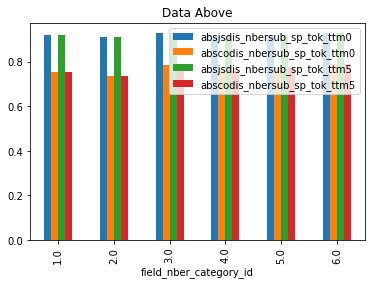

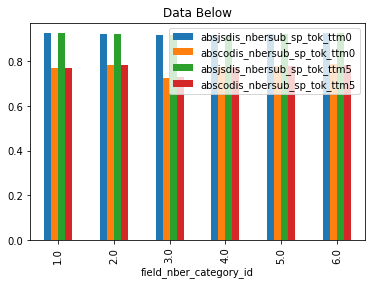

In [106]:
data_above_groupby.plot(kind='bar', title='Data Above')
data_below_groupby.plot(kind='bar', title='Data Below')

In [74]:
data_above.columns

Index(['absjsdis_nbersub_sp_tok_ttm0', 'absjsdis_nbersub_sp_pos_ttm0',
       'abscodis_nbersub_sp_tok_ttm0', 'abscodis_nbersub_sp_pos_ttm0',
       'absjsdis_nbersub_sp_tok_ttm5', 'absjsdis_nbersub_sp_pos_ttm5',
       'abscodis_nbersub_sp_tok_ttm5', 'abscodis_nbersub_sp_pos_ttm5',
       'application_year', 'field_nber_category_id',
       'field_nber_subcategory_id', 'abs_ntokens_sp_tok',
       'abs_ntokens_unique_sp_tok', 'cd_5'],
      dtype='object')

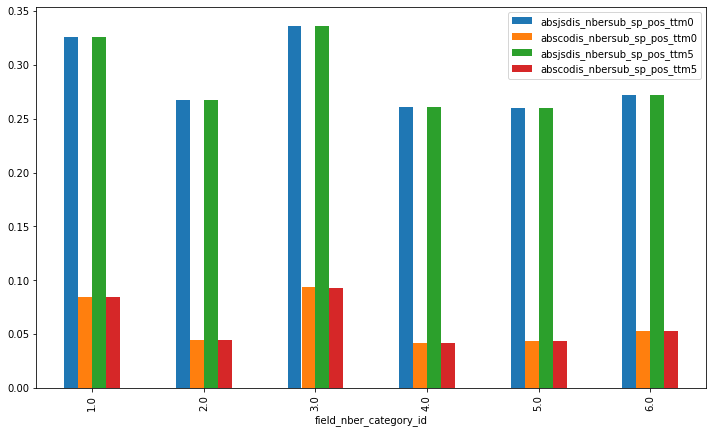

In [76]:
data_above.groupby('field_nber_category_id')['absjsdis_nbersub_sp_pos_ttm0','abscodis_nbersub_sp_pos_ttm0',
                                            'absjsdis_nbersub_sp_pos_ttm5', 'abscodis_nbersub_sp_pos_ttm5'].mean().plot(kind='bar', figsize=(12,7))

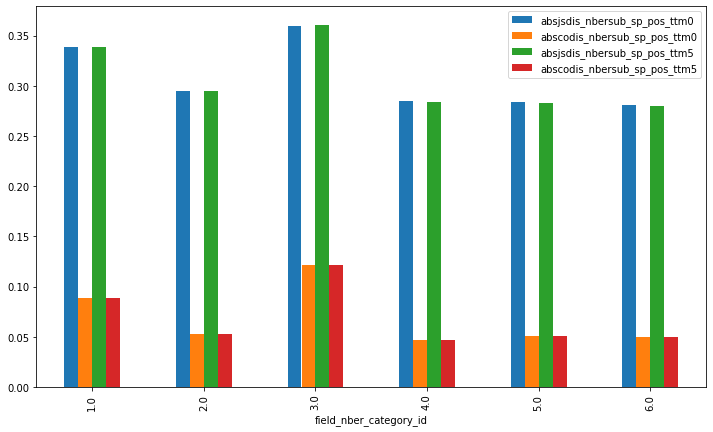

In [80]:
data_below.groupby('field_nber_category_id')['absjsdis_nbersub_sp_pos_ttm0','abscodis_nbersub_sp_pos_ttm0',
                                            'absjsdis_nbersub_sp_pos_ttm5', 'abscodis_nbersub_sp_pos_ttm5'].mean().plot(kind='bar', figsize=(12,7))

In [63]:
data_above.columns

Index(['absjsdis_nbersub_sp_tok_ttm0', 'absjsdis_nbersub_sp_pos_ttm0',
       'abscodis_nbersub_sp_tok_ttm0', 'abscodis_nbersub_sp_pos_ttm0',
       'absjsdis_nbersub_sp_tok_ttm5', 'absjsdis_nbersub_sp_pos_ttm5',
       'abscodis_nbersub_sp_tok_ttm5', 'abscodis_nbersub_sp_pos_ttm5',
       'application_year', 'field_nber_category_id',
       'field_nber_subcategory_id', 'abs_ntokens_sp_tok',
       'abs_ntokens_unique_sp_tok', 'cd_5'],
      dtype='object')

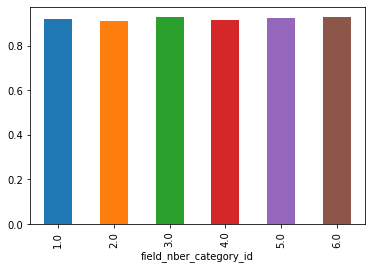

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
data_above.groupby('field_nber_category_id')['absjsdis_nbersub_sp_tok_ttm0'].mean().plot(kind='bar')